In [60]:
from glob import glob
import seaborn as sns
import json
import pandas as pd
import os
import matplotlib.pyplot as plt

In [61]:
kws_globstr = r"C:\projects\malachor5\data\keyword_search\tira_eval_kws\*-window.json"
kws_files = glob(kws_globstr)
kws_files

['C:\\projects\\malachor5\\data\\keyword_search\\tira_eval_kws\\HH20210312-0_5sec-window.json',
 'C:\\projects\\malachor5\\data\\keyword_search\\tira_eval_kws\\HH20210312-2sec-window.json',
 'C:\\projects\\malachor5\\data\\keyword_search\\tira_eval_kws\\HH20210913-0_5sec-window.json',
 'C:\\projects\\malachor5\\data\\keyword_search\\tira_eval_kws\\HH20210913-2sec-window.json',
 'C:\\projects\\malachor5\\data\\keyword_search\\tira_eval_kws\\HH20220327_2-0_5sec-window.json',
 'C:\\projects\\malachor5\\data\\keyword_search\\tira_eval_kws\\HH20220327_2-2sec-window.json']

In [62]:
rows = []
for kws_path in kws_files:
    kws_basename = os.path.basename(kws_path)
    kws_stem, window_len = kws_basename.split('-')[:2]
    with open(kws_path, encoding='utf8') as f:
        kws_obj=json.load(f)
    metrics = kws_obj['metrics']
    for metric in metrics:
        rows.append({
            "source": kws_stem,
            "window_len": window_len,
            "eer": metric['eer'],
            "eer_threshold": metric['eer_threshold'],
            "eer_windowed": metric.get('eer_windowed', None),
            "eer_threshold_windowed": metric.get('eer_threshold_windowed', None),
            "lr_eer": metric['lr_eer'],
            "lr_eer_threshold": metric['lr_eer_threshold'],
            "lr_beta1": metric["lr_params"]["lr_coefficients"][0][0],
            "lr_beta2": metric["lr_params"]["lr_coefficients"][0][1],
            "lr_intercept": metric["lr_params"]["lr_intercept"],
            "keyword": metric["keyword"]
        })
df = pd.DataFrame(rows)
df['keyword_len']=df['keyword'].str.len()
df.head()

,source,window_len,eer,eer_threshold,eer_windowed,eer_threshold_windowed,lr_eer,lr_eer_threshold,lr_beta1,lr_beta2,lr_intercept,keyword,keyword_len
0,HH20210312,0_5sec,0.093894,0.318801,0.007937,0.626629,0.104118,0.000164,0.167776,-0.269024,-8.618689,lǎ,3
1,HH20210312,0_5sec,0.253425,0.222414,0.409302,0.319894,0.253425,0.015473,9.784318,-2.320250,-4.925450,làŋə̀l,7
2,HH20210312,0_5sec,0.240878,0.223010,0.388889,0.379708,0.147172,0.000159,0.126761,0.030315,-8.796386,və́lɛ̀ðǎjó,12
3,HH20210312,0_5sec,0.214286,0.232629,0.273092,0.370348,0.214286,0.001639,2.407212,-1.441719,-6.137244,ɲál,4
4,HH20210312,0_5sec,0.103930,0.260039,0.500000,0.315854,0.152050,0.000167,0.418592,-0.059985,-8.761223,jɛ,2


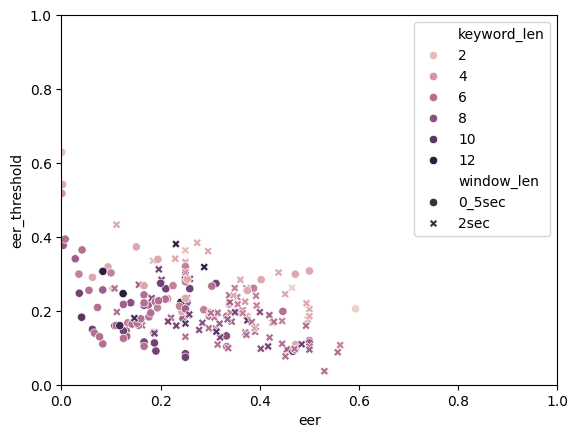

In [63]:
fig=sns.scatterplot(df, x='eer', y='eer_threshold', hue='keyword_len', style="window_len")
fig.set(ylim=(0,1), xlim=(0,1))
# for _, row in df.iterrows():
    # plt.text(row['eer'], row['eer_threshold'], row['keyword'])
plt.show()

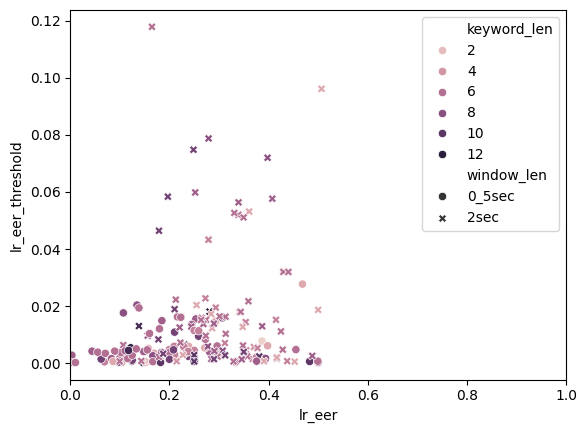

In [64]:
fig=sns.scatterplot(df, x='lr_eer', y='lr_eer_threshold', hue='keyword_len', style="window_len")
fig.set(xlim=(0,1))
plt.show()

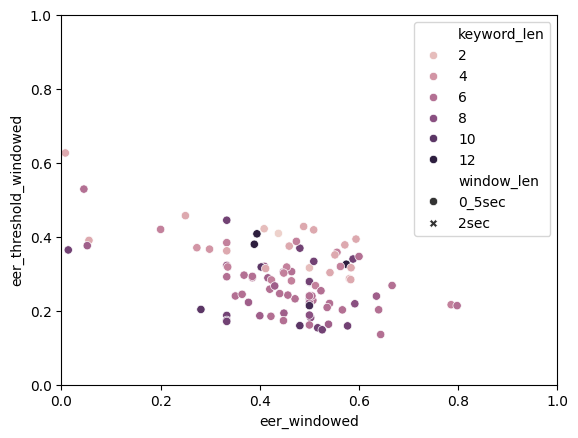

In [65]:
fig=sns.scatterplot(df, x='eer_windowed', y='eer_threshold_windowed', hue='keyword_len', style="window_len")
fig.set(ylim=(0,1), xlim=(0,1))
# for _, row in df.iterrows():
    # plt.text(row['eer'], row['eer_threshold'], row['keyword'])
plt.show()

In [74]:
df.pivot_table(index='window_len', values=['eer'], aggfunc='mean')

,eer
window_len,
0_5sec,0.207335
2sec,0.338059


In [81]:
df.loc[df['window_len']=='0_5sec',['keyword_len', 'eer', 'eer_threshold']].corr('spearman')

,keyword_len,eer,eer_threshold
keyword_len,1.000000,-0.125368,-0.358668
eer,-0.125368,1.000000,-0.233399
eer_threshold,-0.358668,-0.233399,1.000000


In [82]:
df.loc[df['window_len']=='2sec',['keyword_len', 'eer', 'eer_threshold']].corr('spearman')

,keyword_len,eer,eer_threshold
keyword_len,1.000000,-0.286889,-0.323603
eer,-0.286889,1.000000,-0.426299
eer_threshold,-0.323603,-0.426299,1.000000
